# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

Прежде чем проводить исследование необходимо провести предобратотку данных:
- Найти и изучить пропущенные значения в столбцах
- Рассмотреть типы данных в каждом столбце
- Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты

Далее добавим в таблицу новые столбцы и проведем исследовательский анализ данных:
- Изучите, как быстро продаваются квартиры
- Определить факторы, которые больше всего влияют на общую стоимость квартиры
- Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

В конце исследования сформулируем общий вывод.


## Шаг 1. Откройте файл с данными и изучите общую информацию

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/music/Practicum_projects/real_estate_sp/real_estate_data.csv', sep='\t')

### Выводим первые 20 строчек датафрейма `data` на экран

In [6]:
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Общая гистрограмма для всех столбцов таблицы

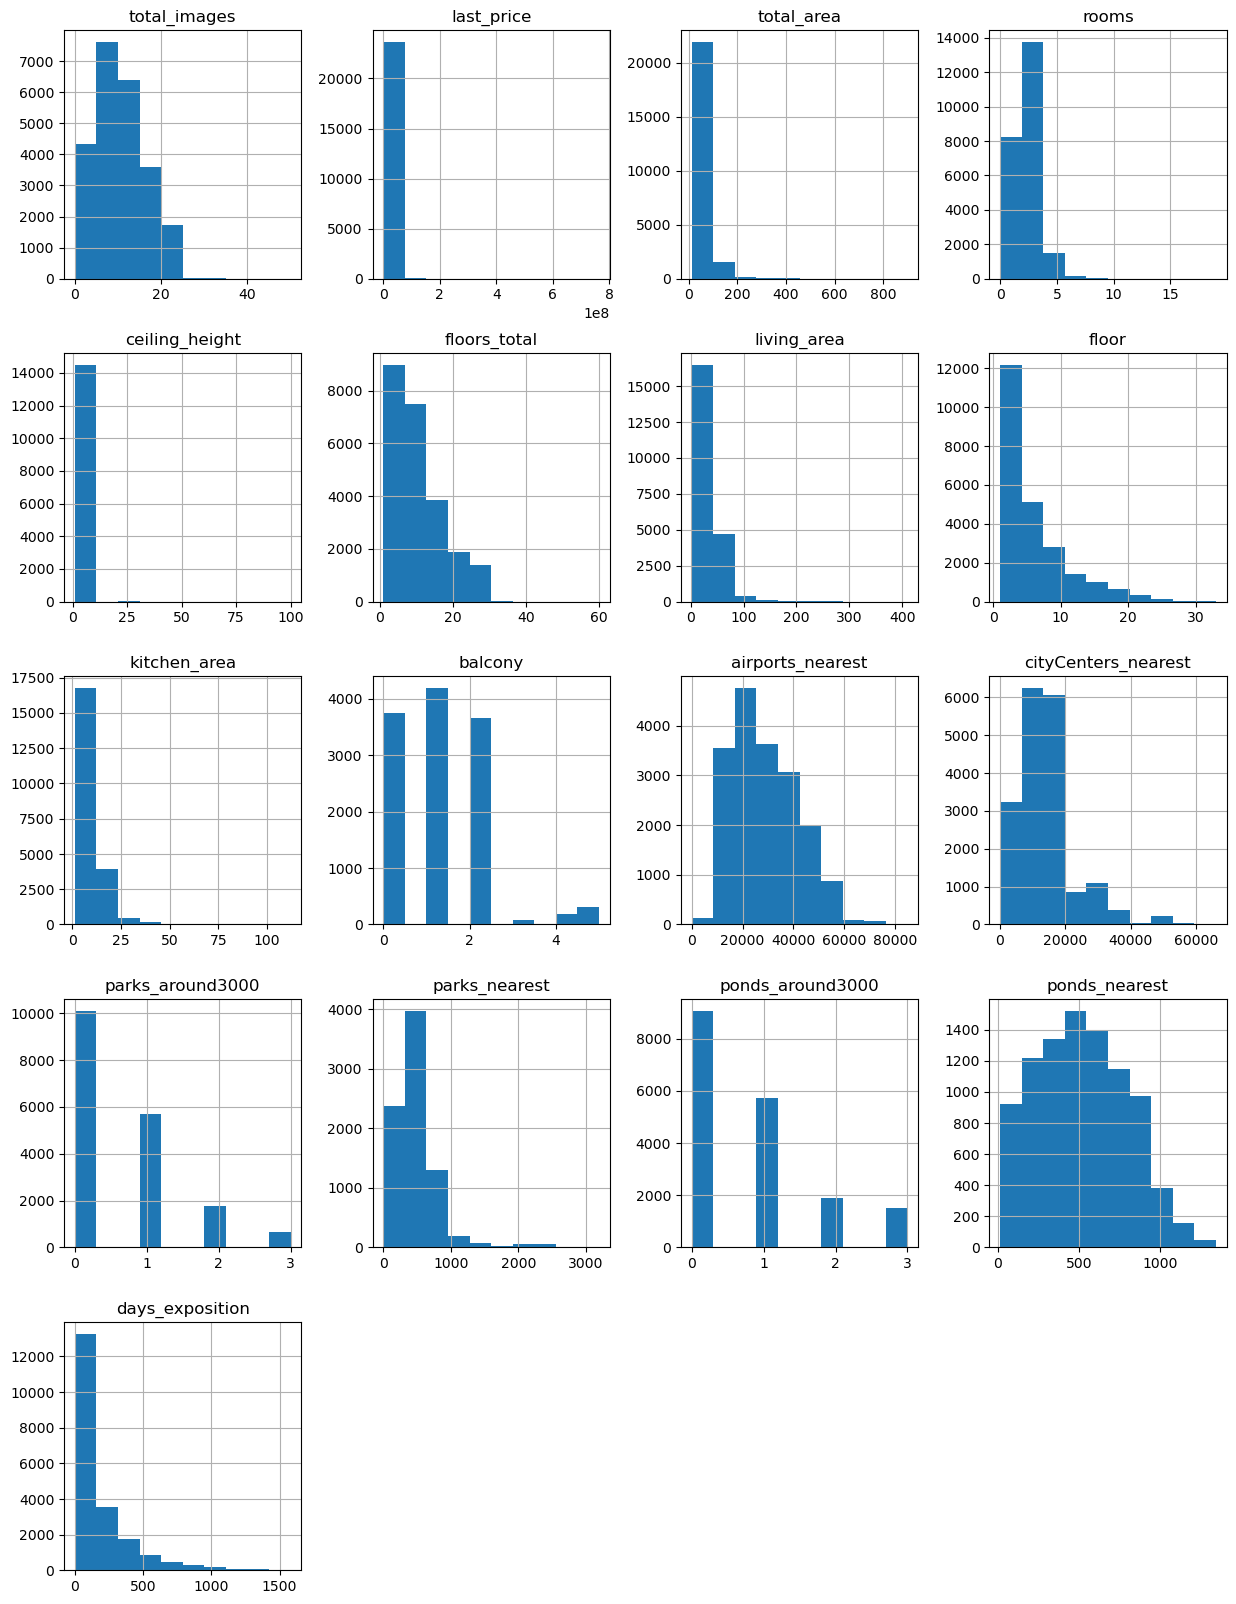

In [8]:
data.hist(figsize=(15, 20));

## Шаг 2. Предобработка данных

### Устранение пропусков

In [11]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [12]:
# check
# пропущенные значения бары

def pass_value_barh(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
  
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

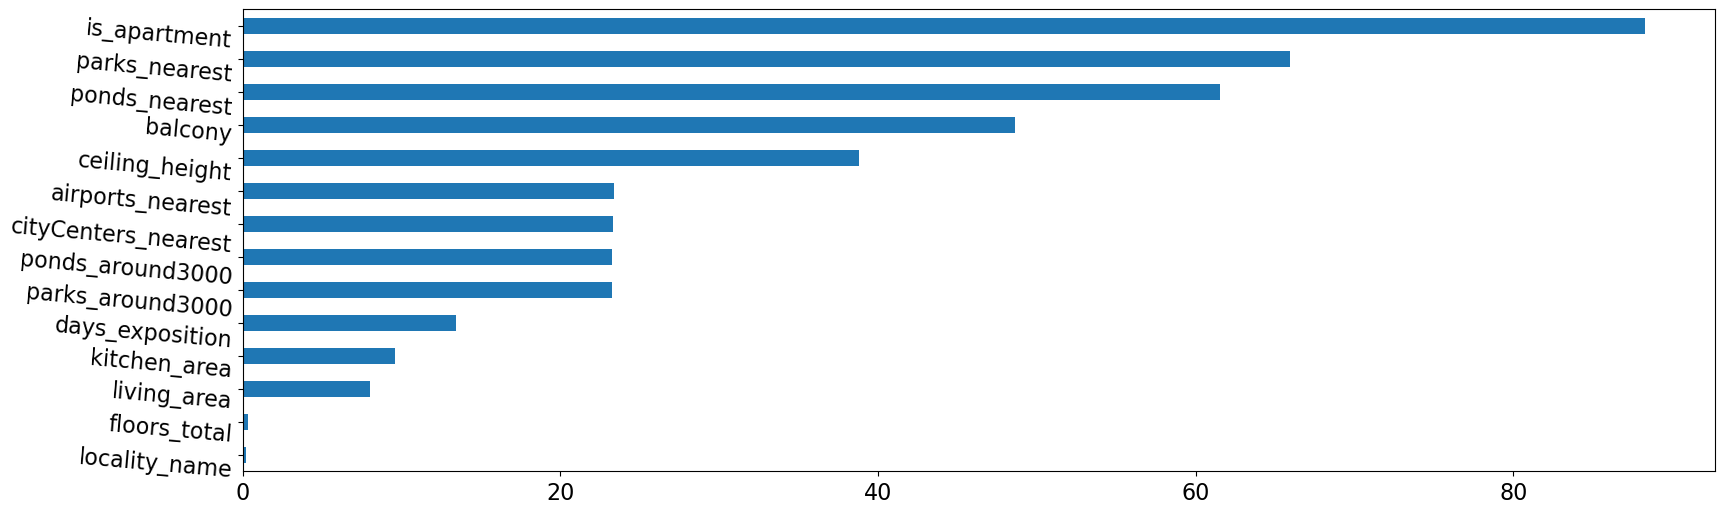

In [13]:
pass_value_barh(data)

balcony - заменим пропуски на нули

In [15]:
data['balcony'] = data['balcony'].fillna(value=0)

ceiling_height - заменим на медиану. 9195 пропусков (довольно много). Заменим на медиану, так как стандрартые потолки 2.65 метра (медина). У тех у кого потолки высокие это обязательно указали бы.

In [17]:
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(value=ceiling_height_median) 

floor_total; locality_name - удалим строки. Ни медиана, ни среднее значение здесь не подходит. Так как их мало, их можно удалить

In [19]:
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

Проверим состав значений столбца 'is_apartment'. Всего апартаментов - 50, очень мало. Вероятно там где пропуски (20924) - все квартиры. Заменим значения на "False".

In [21]:
data['is_apartment'].value_counts()

is_apartment
False    2710
True       50
Name: count, dtype: int64

In [22]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
data['is_apartment'] = data['is_apartment'].fillna(value=False)

living_area: 1827 пропусков - не так критично, так как везде заполнена общая площадь.
days_exposition: 3075 - довольно много. С этим ничего не поделаешь.
Остальные столбцы (airoports_nearest (5502 пропуска); city_centeres_nearest (5482 пропуска); parks_around3000 (5481 пропуска); parks_nearest (15382 пропуска); ponds_around3000 (5481 пропуска); ponds_nearest (14406 пропуска) также ничем не заменишь. Удалять из тоже нельзя, так как этих значений довольно много.

### Название столбцов: изменим название столбца 'cityCenters_nearest'

In [25]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

### Проверка типов данных

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest      18

In [28]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Поменяем тип данных в следующих столбцах:
- first_day_exposition: object на дату
- last price; floors_total; balcony; floors_total: float на integer

In [30]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data[['last_price', 'balcony', 'floors_total']] = data[['last_price', 'balcony', 'floors_total']].apply(lambda x: x.astype('int64'))

In [31]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Обработаем неявные дубликаты в столбце locality_name

In [33]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [34]:
data['locality_name'] = (data['locality_name']
                         .str.replace('ё', 'е')
                         .str.replace('городской поселок','поселок городского типа')
                        )

#### check name

In [36]:
# check
data.locality_name.nunique()

323

### Проанализируем данные, убирем редкие и аномальные значения

In [38]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565,23565.000000,23565.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2017-11-10 08:59:53.125398016,2.070656,2.724530,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-15 00:00:00,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,2018-08-26 00:00:00,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.681156,1.091093e+07,35.657060,NaN,1.078591,0.991026,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782


Построим диаграмму размаха для living_area

<Axes: >

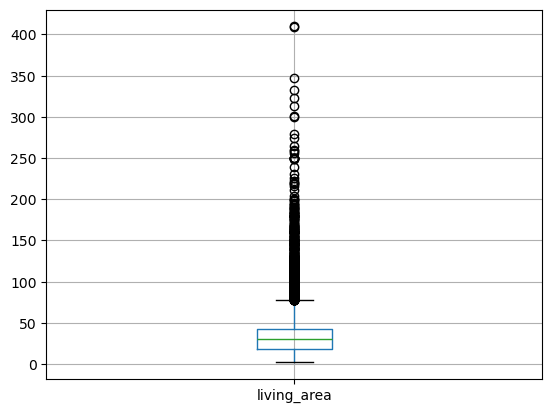

In [40]:
data.boxplot('living_area')

In [41]:
data.query('living_area > 160')['living_area'].count()

89

Квартир с жилой площадью больше 160 м2 89 штук. Удалим эти квартиры.

In [43]:
data.drop(index=data.query('living_area > 160').index,inplace=True)

In [44]:
data.query('living_area < 10')['living_area'].count()

25

Квартир с жилой площадью меньше 10 метров всего 25. Удалим эти строки.

In [46]:
data.drop(index=data.query('living_area < 10').index,inplace=True)

Построим диаграмму размаха для kitchen_area

<Axes: >

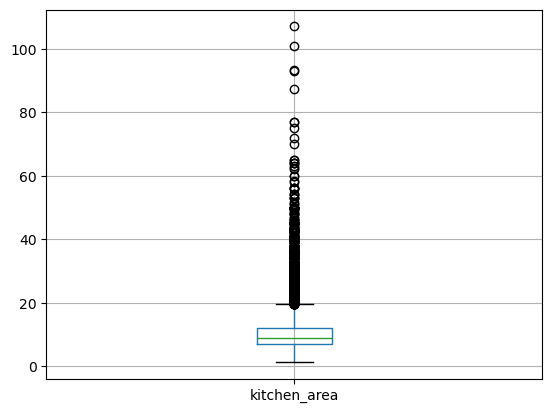

In [48]:
data.boxplot('kitchen_area')

In [49]:
data.query('kitchen_area > 40')['kitchen_area'].count()

109

Квартир с кухней больше 40 метров 40 штук. Удалим эти строки.

In [51]:
data.drop(index=data.query('kitchen_area > 40').index,inplace=True)

In [52]:
data.query('kitchen_area < 5')['kitchen_area'].count()

104

Квартир с кухнями меньше 5 метров 103. Удалим эти строки

In [54]:
data.drop(index=data.query('kitchen_area < 5').index,inplace=True)

Построим диаграмму размаха для days_exposition

<Axes: >

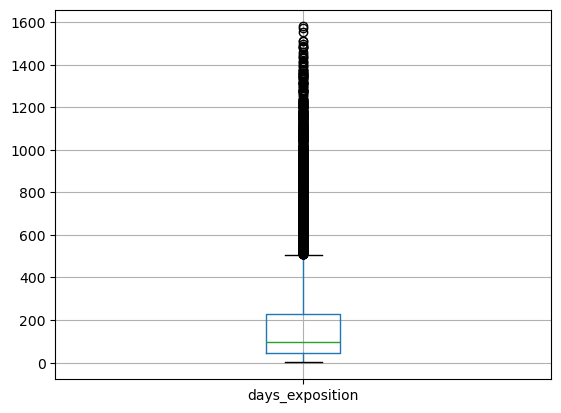

In [56]:
data.boxplot('days_exposition')

In [57]:
data.query('days_exposition > 1000')['days_exposition'].count()

265

Квартиры, которые продаются больше 1000 дней - 219 штук. Удалим эти строки.

In [59]:
data.drop(index=data.query('days_exposition > 1000').index,inplace=True)

Удаляем квартиры с общей площадью меньше 14 квадратных метров (согласно СНИПу, это минимум). Их 5 штук.

In [61]:
data.query('total_area < 14')['total_area'].count()

5

In [62]:
data.drop(index=data.query('total_area < 14').index,inplace=True)

Удалим квартиры стоимостью выше 40 млн. рублей. Их меньше одного процента

In [64]:
data.query('last_price > 40e+06').last_price.count()

107

In [65]:
data.drop(index=data.query('last_price > 40e+06').index,inplace=True)

Квартир площадью больше 250 квадратных метров 17 штук. Их можно удалить.

In [67]:
data.query('total_area > 250')['total_area'].count()

17

In [68]:
data.drop(index=data.query('total_area > 250').index,inplace=True)

Квартир где количество комнат больше 6 40 штук. Можно удалить эти строчки.

In [70]:
data.query('rooms > 6')['rooms'].count()

40

In [71]:
data.drop(index=data.query('rooms > 6').index,inplace=True)

Отфильтруем высоту потолков: 2.5 метра - минимум согласно СНиПу. Максимальную высоту установим на уровне шести метров.

In [73]:
data = data[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 6)]

Квартир на 27 этаже и выше всего 37. Их можно убрать. Столбик floor тоже изменится.

In [75]:
data.query('floors_total > 27')['floors_total'].count()

52

In [76]:
data.drop(index=data.query('floors_total > 27').index,inplace=True)

Была проведена предобратотка данных в ходе которой:
- Заменены пропуски в столбцах balcony; ceiling_height
- Удалены строки с пропусками в столбцах floor_total; locality_name
- Название столбца cityCenters_nearest заменено на city_centers_nearest
- В столбце first_day_exposition тип данных object заменен  на дату
- В столбцах last price; floors_total; balcony тип данных float заменен на integer
- Обработаны неявные дубликаты в столбце locality_name
- Убирем редкие и аномальные значения: квартиры с жилой площадью больше 160 м2(89 шту); квартиры с жилой площадью меньше 10 м2(25 объектов); квартиры с кухней больше 40 метров(109 штук); квартиры с кухней меньше 5 метров квадратных(104 штуки); объявления, которые весят больше 1000 дней(265 объектов); квартиры дороже 40 млн. руб.(их меньше 1%); квартиры с общей площадью меньше 14 кв. метров(5 штук); квартиры с общей площадье больше 250 кв. метров(17 штук); квартиры, где количество комнат боьше 6(40 штук)
- Высоту потолков установили в диапазоне от 2.5 до 6 метров

Общие потери - 913 записей(3.8% от общего массива данных).


## Шаг 3. Добавим в таблицу новые столбцы

In [79]:
data['price_meter']=data.last_price / data.total_area
data['publication_day'] = data.first_day_exposition.dt.dayofweek
data['publication_month'] = data.first_day_exposition.dt.month
data['publication_year'] = data.first_day_exposition.dt.year

data['distance_to_center'] = (data.city_centers_nearest / 1000).round()

def floor_type_func(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'

data['floor_type'] = data.apply(floor_type_func, axis=1)

## Шаг 4. Исследовательский анализ данных

In [81]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,publication_day,publication_month,publication_year,distance_to_center,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,16.0,Другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,19.0,Первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,14.0,Другой
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,NaN,Другой
6,6,3700000,37.3,2017-11-02,1,2.65,26,10.6,6,False,False,False,14.4,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,19.0,Другой


In [82]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,publication_day,publication_month,publication_year,distance_to_center
count,22652.000000,2.265200e+04,22652.000000,22652,22652.000000,22652.000000,22652.000000,20859.000000,22652.000000,20501.000000,22652.000000,17258.000000,17278.000000,17279.000000,7592.000000,17279.000000,8520.000000,19625.000000,22652.000000,22652.000000,22652.000000,22652.000000,17278.000000
mean,9.868577,5.768830e+06,57.775057,2017-11-22 03:45:36.711990016,2.026488,2.691474,10.703117,33.104860,5.878289,10.194908,0.595709,28852.364758,14332.269823,0.597199,491.661354,0.748365,525.301878,166.157248,96868.157356,2.571075,6.402216,2017.403187,14.326600
min,0.000000,4.300000e+05,15.000000,2014-11-27 00:00:00,0.000000,2.500000,1.000000,10.000000,1.000000,5.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,7962.962963,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-28 00:00:00,1.000000,2.600000,5.000000,18.500000,2.000000,7.000000,0.000000,18446.750000,9576.000000,0.000000,288.000000,0.000000,303.000000,44.000000,76271.186441,1.000000,3.000000,2017.000000,10.000000
50%,9.000000,4.600000e+06,51.330000,2017-12-18 00:00:00,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26905.000000,13191.500000,0.000000,456.000000,0.000000,511.000000,92.000000,94594.594595,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.600000e+06,68.000000,2018-08-29 00:00:00,3.000000,2.700000,16.000000,42.000000,8.000000,11.780000,1.000000,37407.000000,16311.000000,1.000000,613.000000,1.000000,734.250000,219.000000,113250.000000,4.000000,10.000000,2018.000000,16.000000
max,50.000000,4.000000e+07,250.000000,2019-05-03 00:00:00,6.000000,5.800000,27.000000,160.000000,27.000000,40.000000,5.000000,84853.000000,65952.000000,3.000000,3190.000000,3.000000,1344.000000,1000.000000,848484.848485,6.000000,12.000000,2019.000000,66.000000
std,5.656221,4.306514e+06,26.238637,NaN,0.984272,0.207326,6.525859,17.294778,4.844569,4.587240,0.960560,12702.291845,8542.702324,0.788361,339.027230,0.922695,277.050249,186.777963,37988.085619,1.789118,3.488551,1.003871,8.550704


### Исcледование отдельных параметров

**Общая площадь**

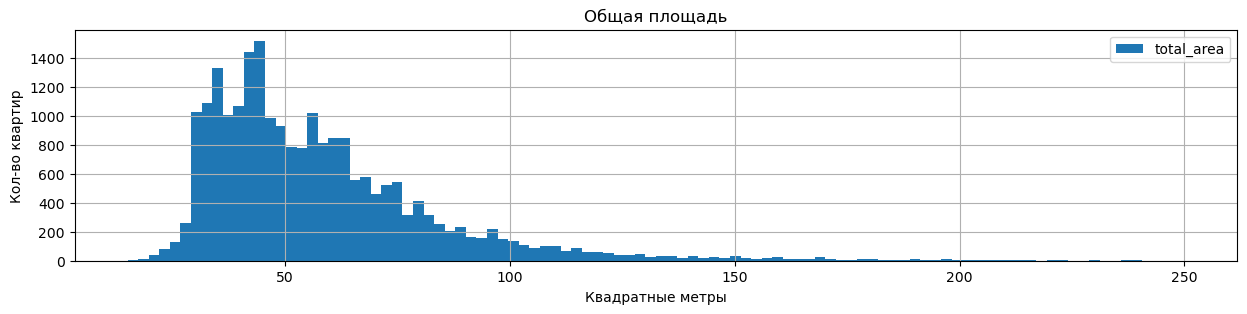

In [85]:
data.plot(y='total_area', bins=100, kind='hist', grid=True, figsize = (15,3))
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Кол-во квартир');

plt.show()

In [86]:
data.query('total_area < 75').total_area.count()

18437

Здесь три пика.

Большая чать квартир с общей площадью менее 75 метров квадратных.

Медиана (51.40) практически совпадает с пиком в 45-50 метров. 

**Жилая площадь**

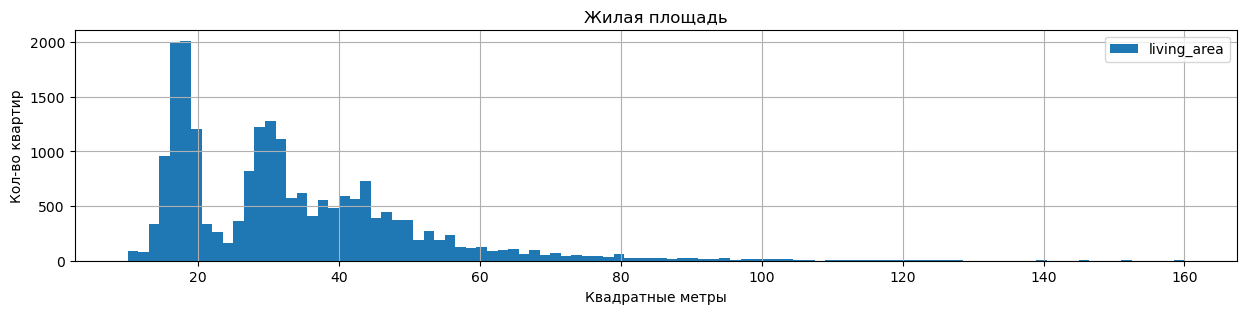

In [89]:
data.plot(y='living_area', bins=100, kind='hist', grid=True, figsize = (15,3))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Кол-во квартир');

plt.show()

Есть два пика. Напоминает предыдущий график.

**Площадь кухни**

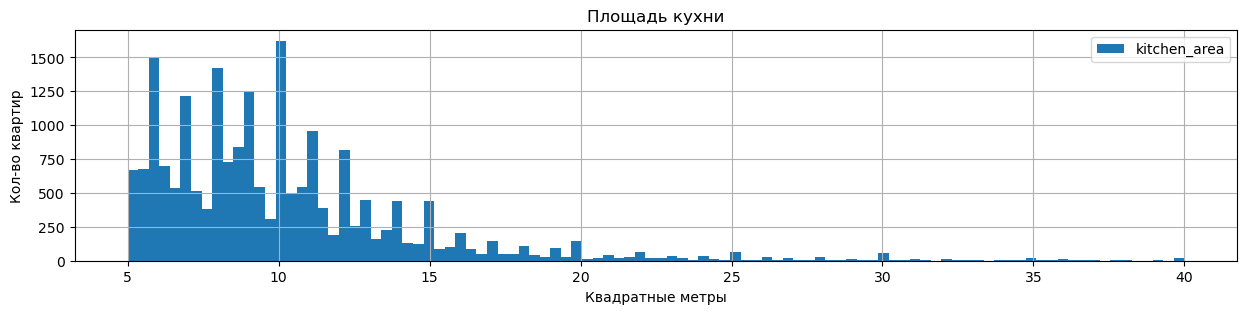

In [92]:
data.plot(y='kitchen_area', bins=100, kind='hist', grid=True, figsize = (15,3))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Кол-во квартир');

plt.show()

Стандартная кухня в 9 м2 хорошо выделяется на графике. Есть много зубцов. похоже имеется много нестандартных размеров кухонь.

**Цена объекта**

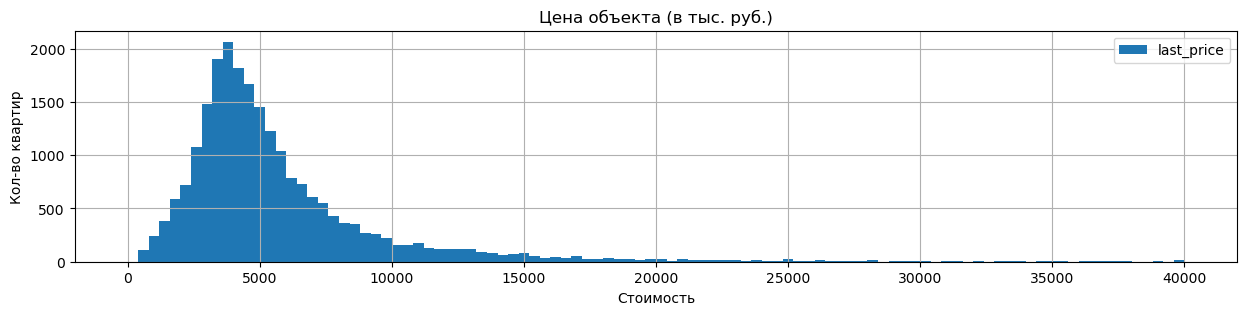

In [95]:
data['last_price'] = data['last_price'] / 1000
data.plot(y='last_price', bins=100, kind='hist', range=(0,4.e+04), grid=True, figsize = (15,3));
plt.title('Цена объекта (в тыс. руб.)')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во квартир');

plt.show()


Основная масса объектов (90%) - квартиры стоймостью до 10 млн. руб.

Медиана - 4.6 млн. руб.

На графике виден хвост справа. Это объесняет почему средняя цена (5.8 млн. руб.) больше на 26% медианы.

**Количество комнат**

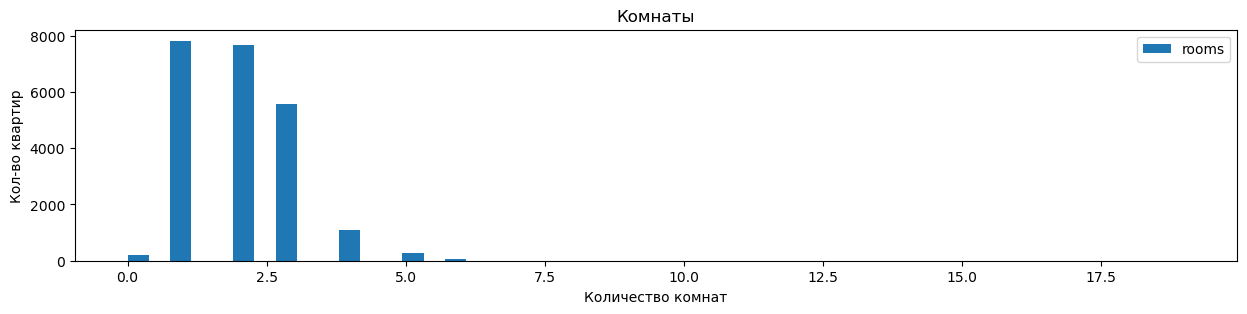

In [98]:
data.plot(y='rooms', bins=50, kind='hist', range=(0,19), figsize = (15,3));
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Кол-во квартир');

plt.show()

In [99]:
data.groupby('rooms').rooms.count()

rooms
0     188
1    7824
2    7655
3    5575
4    1077
5     261
6      72
Name: rooms, dtype: int64

Распределение между 1-3 комнатами примерно одинаковое.

**Высота потолков**

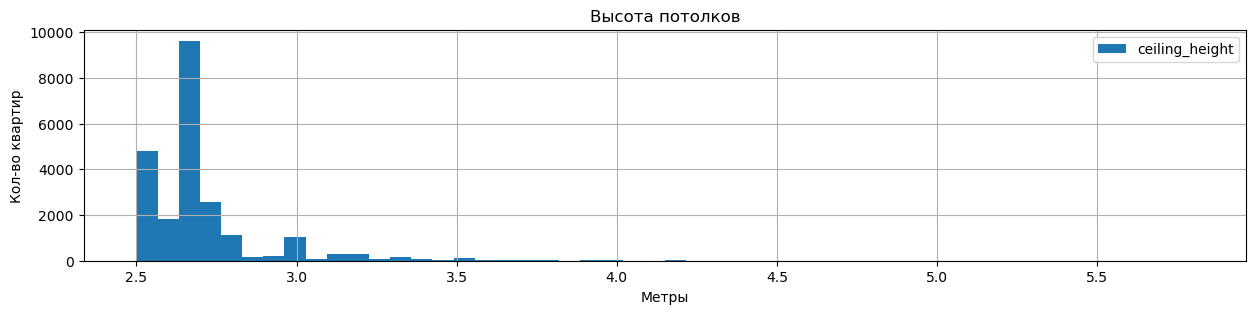

In [102]:
data.plot(y='ceiling_height', bins=50, kind='hist', grid=True, figsize = (15,3))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Кол-во квартир');

plt.show()

In [103]:
data.ceiling_height.value_counts()

ceiling_height
2.65    9465
2.50    3443
2.60    1619
2.70    1528
3.00    1026
        ... 
4.80       1
3.86       1
3.68       1
3.44       1
3.59       1
Name: count, Length: 145, dtype: int64

Среднее значение (2.69) практически совпадает с медианой (2.65). Эти значения совпадают с пиком на графике. Это логично. Квартир с высотой потолков 2.65 - абсолютное большинство.

**Этаж квартиры**

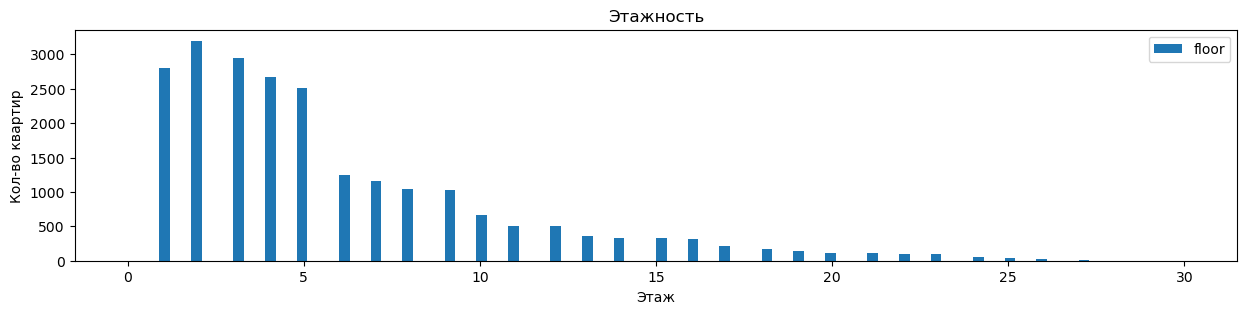

In [106]:
data.plot(y='floor', bins=100, kind='hist', range=(0,30), figsize = (15,3))
plt.title('Этажность')
plt.xlabel('Этаж')
plt.ylabel('Кол-во квартир');

plt.show()

In [107]:
data.groupby('floor').floor.count()

floor
1     2805
2     3198
3     2947
4     2665
5     2504
6     1243
7     1164
8     1038
9     1024
10     665
11     500
12     504
13     363
14     325
15     329
16     310
17     220
18     165
19     139
20     106
21     115
22     103
23      92
24      58
25      42
26      21
27       7
Name: floor, dtype: int64

In [108]:
percentage = (data[data['floor'] < 10]['floor'].count() / len(data)) * 100
print(f"Процент этажей меньше 10: {percentage:.2f}%")

Процент этажей меньше 10: 82.06%


Основная масса квартир находится ниже 6 этажа. Практически все квартиры (82%) находятся ниже 10 этажа. Типичная этажность в России.


**Тип этажа квартиры**

In [111]:
data.floor_type.value_counts()

floor_type
Другой       16688
Последний     3159
Первый        2805
Name: count, dtype: int64

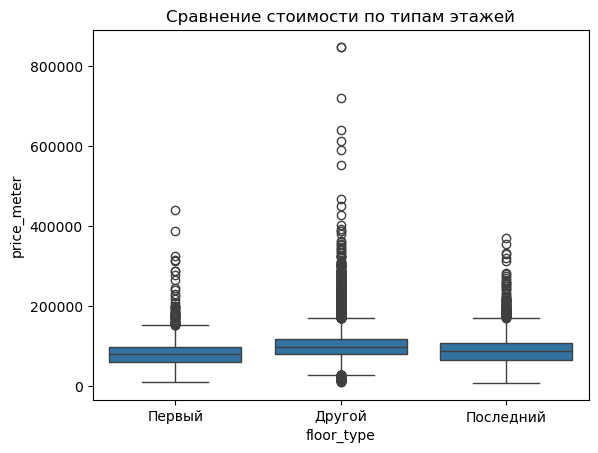

In [112]:
sns.boxplot(x=data.floor_type, y=data.price_meter, order=['Первый', 'Другой', 'Последний'])
plt.title('Сравнение стоимости по типам этажей')

plt.show()

Квартиры с этажом "Другой" имеют больше выбивающихся значений

**Общее количество этажей в доме**

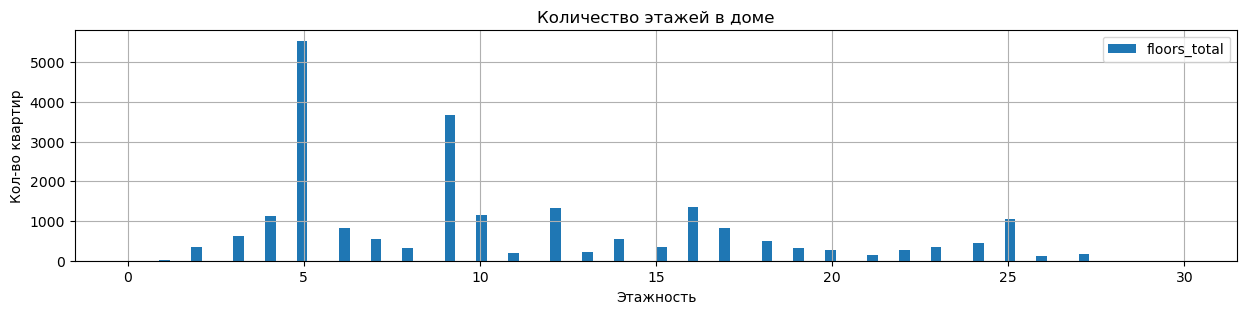

In [115]:
data.plot(y='floors_total', bins=100, kind='hist', range=(0,30), grid=True, figsize = (15,3));
plt.title('Количество этажей в доме')
plt.xlabel('Этажность')
plt.ylabel('Кол-во квартир');

plt.show()

Совпадает с тем что обычно строят в российских городах: пятиэтажки, либо девятиэтажки.

**Расстояние до центра города в метрах**

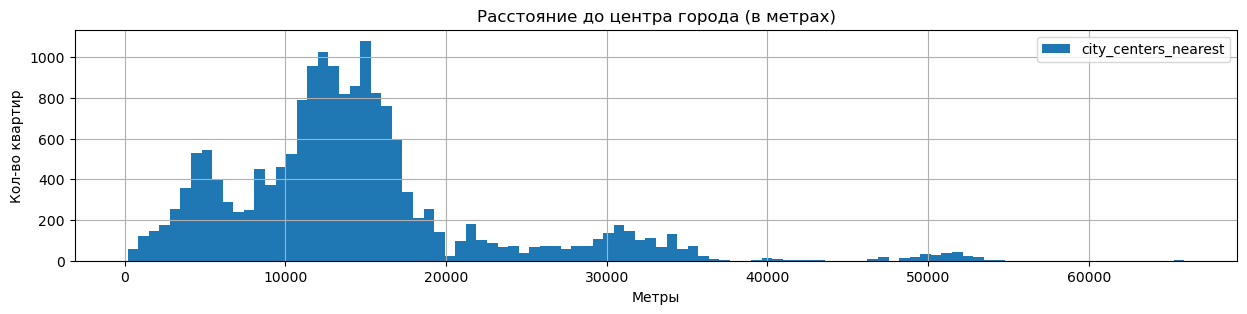

In [118]:
data.plot(y='city_centers_nearest', bins=100, kind='hist', grid=True, figsize = (15,3));
plt.title('Расстояние до центра города (в метрах)')
plt.xlabel('Метры')
plt.ylabel('Кол-во квартир');

plt.show()

5482 значений не участвуют в исследовании. Это довольно много.

Медиана совпадает со средним значением. В основном, люди живут в 13-14 км от центра.

Наблюдается два пика: основная масса живет в радиусе 10-17км. Также есть много тех, чьи квартиры находятся в 5-10км от центра.

**Расстояние до близжайшего аэропорта**

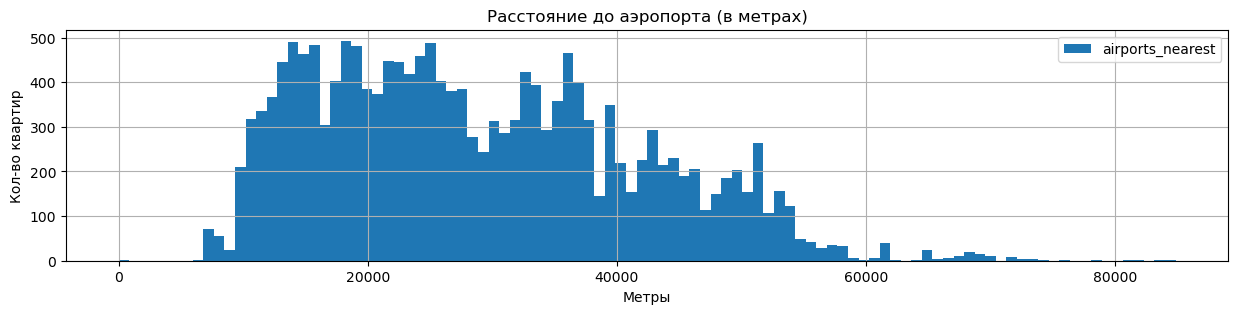

In [121]:
data.plot(y='airports_nearest', bins=100, kind='hist', grid=True, figsize = (15,3));
plt.title('Расстояние до аэропорта (в метрах)')
plt.xlabel('Метры')
plt.ylabel('Кол-во квартир');

plt.show()

Здесь более равномерное распределение. Не наблюдается большой зависимости от расстояния. Аэропорт Пулково находится вне города. Все квартиры находятся примерно на одинаковом расстоянии. Те что подальше находятся с другой стороны от центра города.

**Расстояние до близжайшего парка**

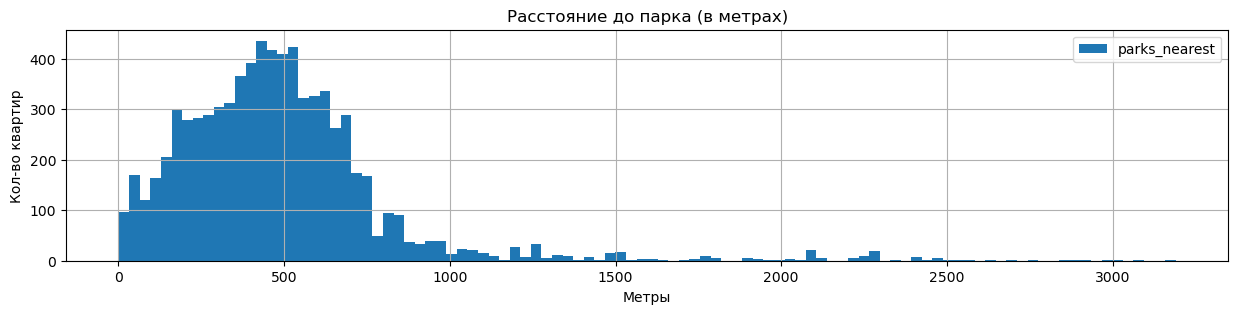

In [124]:
data.plot(y='parks_nearest', bins=100, kind='hist', grid=True, figsize = (15,3));
plt.title('Расстояние до парка (в метрах)')
plt.xlabel('Метры')
plt.ylabel('Кол-во квартир');

plt.show()

**День публикации объявления**

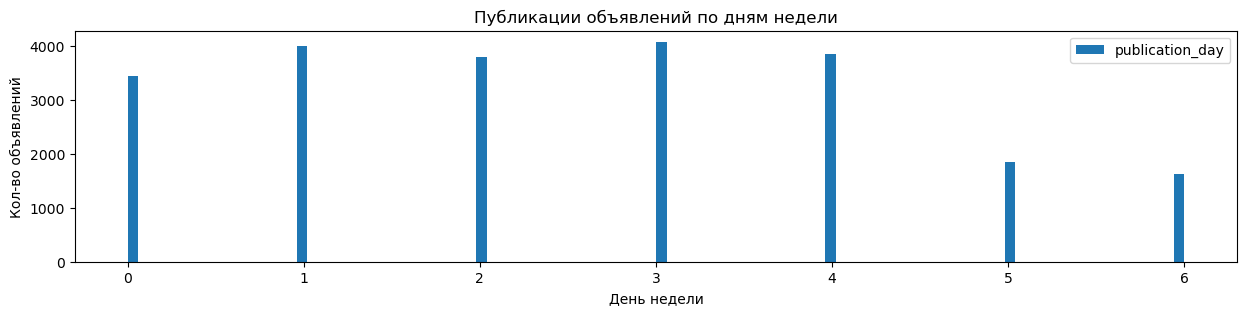

In [126]:
data.plot(y='publication_day', bins=100, kind='hist', figsize = (15,3));
plt.title('Публикации объявлений по дням недели')
plt.xlabel('День недели')
plt.ylabel('Кол-во объявлений');

plt.show()

В будние дни равномерное распределение объявлений. На выходных меньше. Это логично. На выходных народ отдыхает.

**Месяц публикации объявления**

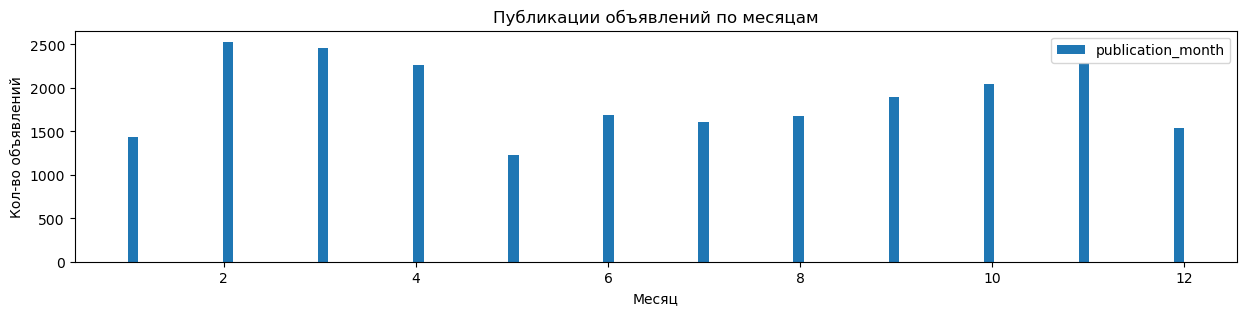

In [129]:
data.plot(y='publication_month', bins=100, kind='hist', figsize = (15,3));
plt.title('Публикации объявлений по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Кол-во объявлений');


plt.show()

Здесь вроде тоже логично. Два пика: весна и осень. Люди страются продать квартиру по весне, либо осенью. Летом - сезон отпусков.

#### check gap

In [132]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22652 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22652 non-null  int64         
 1   last_price            22652 non-null  float64       
 2   total_area            22652 non-null  float64       
 3   first_day_exposition  22652 non-null  datetime64[ns]
 4   rooms                 22652 non-null  int64         
 5   ceiling_height        22652 non-null  float64       
 6   floors_total          22652 non-null  int64         
 7   living_area           20859 non-null  float64       
 8   floor                 22652 non-null  int64         
 9   is_apartment          22652 non-null  bool          
 10  studio                22652 non-null  bool          
 11  open_plan             22652 non-null  bool          
 12  kitchen_area          20501 non-null  float64       
 13  balcony              

In [133]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,652.00","22,652.00","22,652.00","19,625.00","22,652.00","20,859.00","20,501.00","22,652.00","22,652.00"
min,0.00,15.00,2.50,1.00,430.00,10.00,5.00,1.00,1.00
max,6.00,250.00,5.80,"1,000.00","40,000.00",160.00,40.00,27.00,27.00


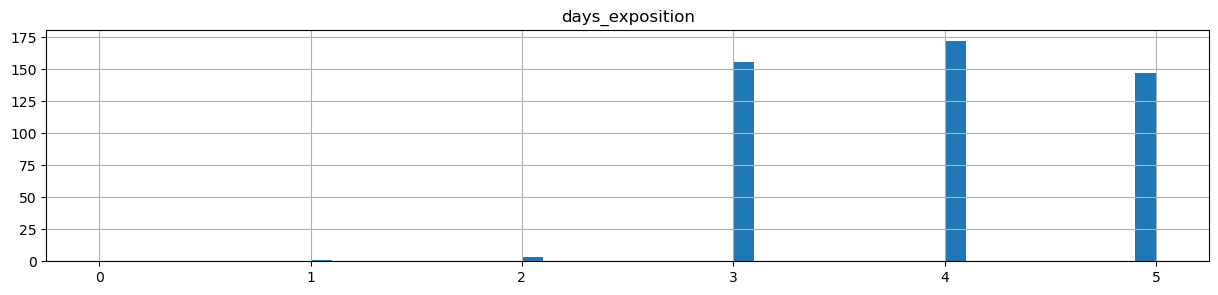

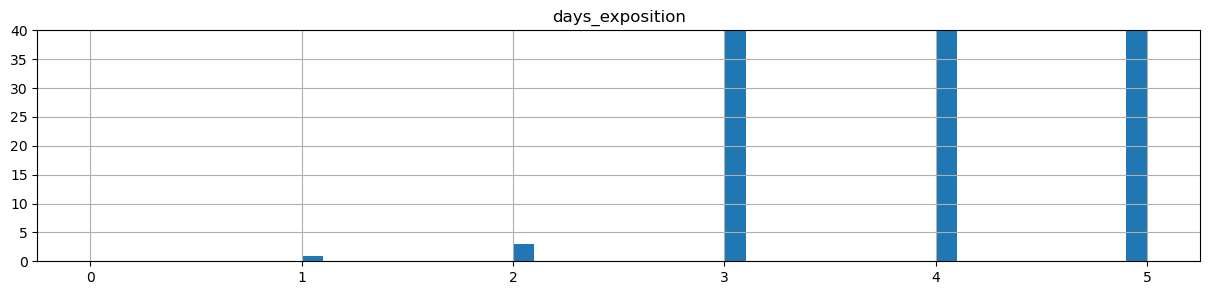

In [134]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [135]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [136]:
# check
df_check.rooms.value_counts().to_frame()

,count
rooms,
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12


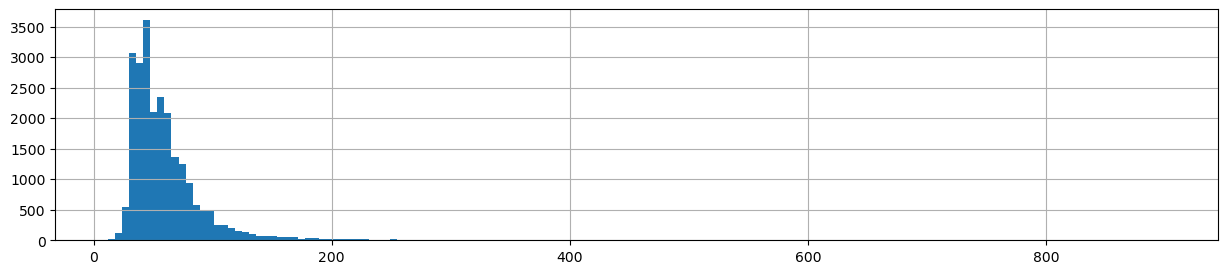

In [137]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

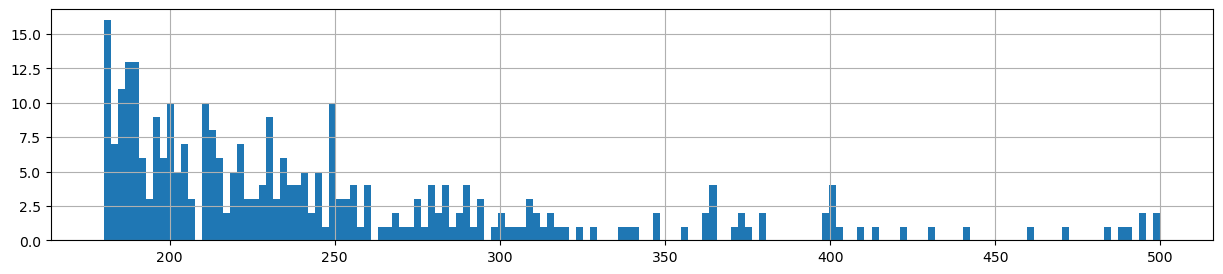

In [138]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

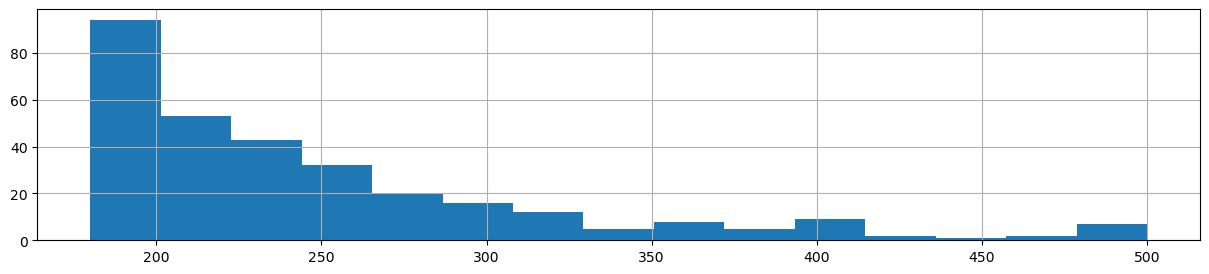

In [139]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

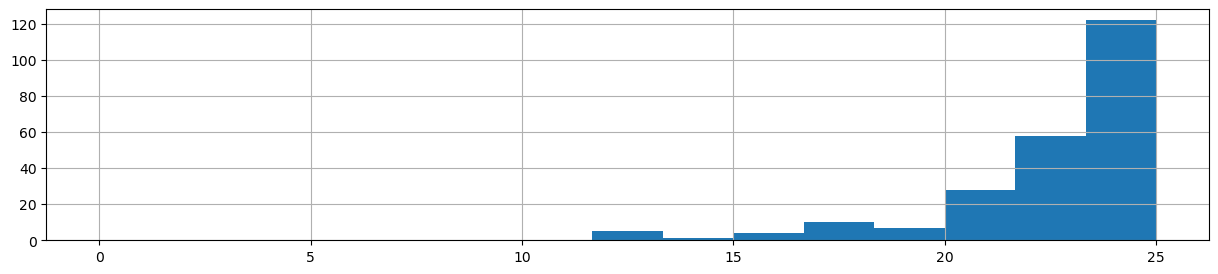

In [140]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [141]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.001200,0.00,20.61,2.50,3.00,560.91,10.00,5.00,1.00,2.00
0.010000,1.00,26.00,2.50,4.00,"1,000.00",13.18,5.00,1.00,2.00
0.500000,2.00,51.33,2.65,92.00,"4,600.00",30.00,9.00,4.00,9.00
0.990000,5.00,158.80,3.50,864.00,"25,000.00",95.30,30.00,22.00,26.00
0.998800,6.00,213.84,4.18,977.45,"37,258.93",140.00,38.92,25.82,27.00


### Скорость продажи объекта

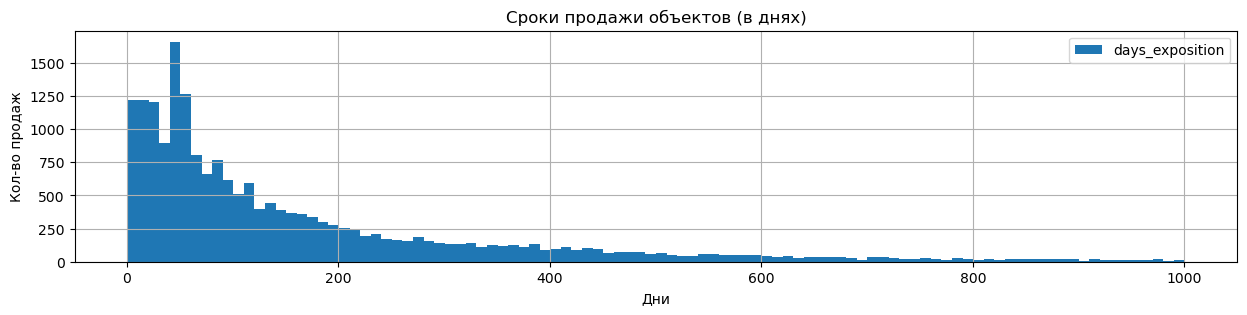

In [143]:
data.plot(y='days_exposition', bins=100, kind='hist', grid=True, figsize = (15,3));
plt.title('Сроки продажи объектов (в днях)')
plt.xlabel('Дни')
plt.ylabel('Кол-во продаж');

plt.show()


Медиана в два раза меньше среднего значения. Квартиры продаются в основном 95 дней, но есть большой количество квартир, которые продаются дольше.

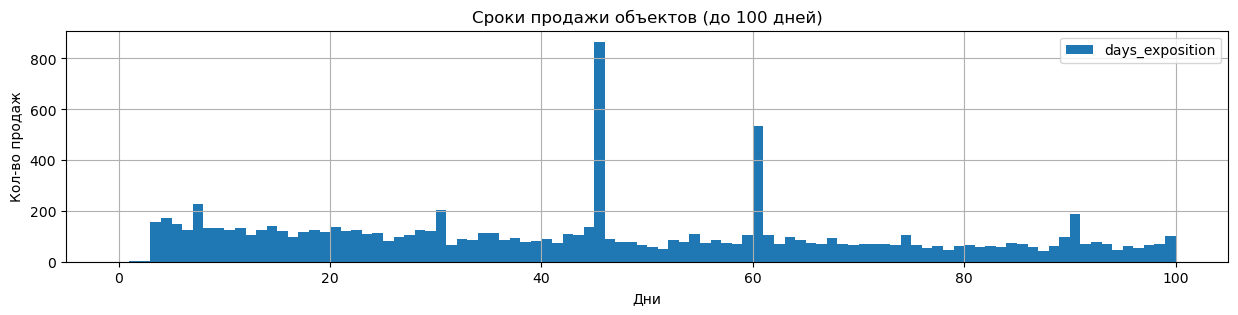

In [145]:
data.plot(y='days_exposition', bins=100, kind='hist', grid=True, range=(0,100), figsize = (15,3));
plt.title('Сроки продажи объектов (до 100 дней)')
plt.xlabel('Дни')
plt.ylabel('Кол-во продаж');

plt.show()


Быстрой продажей можно считать срок в 45-дней. Думаю, это связано со скоростью оформления документов.

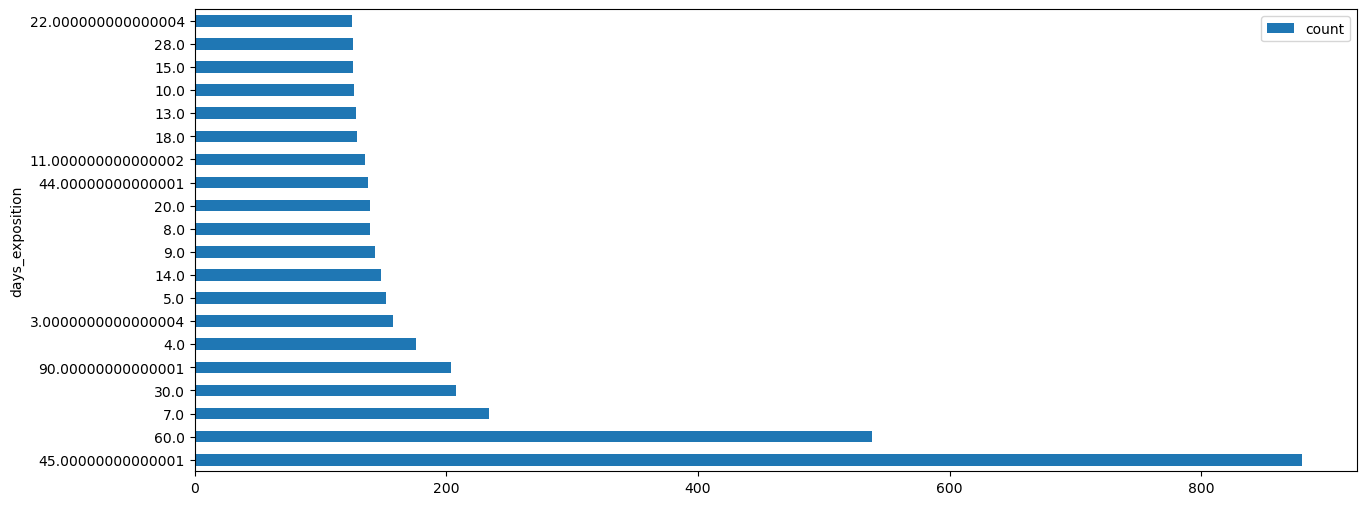

In [147]:
# check
# Моды на сырых данных
     
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

### Факторы, влияющие на общую стоимость объекта

Общая площадь. Зависимость очень высокая.

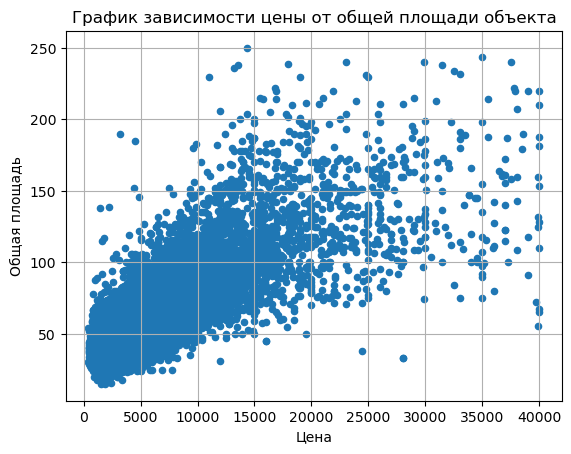

In [150]:
data.plot(x='last_price', y='total_area', kind='scatter', grid=True);
plt.title('График зависимости цены от общей площади объекта')
plt.xlabel('Цена')
plt.ylabel('Общая площадь');

plt.show()

In [151]:
"{:.2f}".format(data['total_area'].corr(data['last_price']))

'0.77'

Жилая площадь. Зависимость тоже довольно высокая. Напоминает предыдущий график.

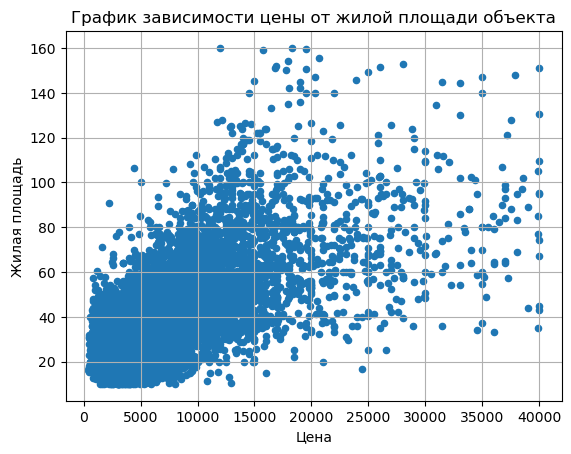

In [153]:
data.plot(x='last_price', y='living_area', kind='scatter', grid=True);
plt.title('График зависимости цены от жилой площади объекта')
plt.xlabel('Цена')
plt.ylabel('Жилая площадь');

plt.show()


In [154]:
"{:.2f}".format(data['living_area'].corr(data['last_price']))

'0.67'

Площадь кухни. Корреляция тоже ощутимая, но меньше.

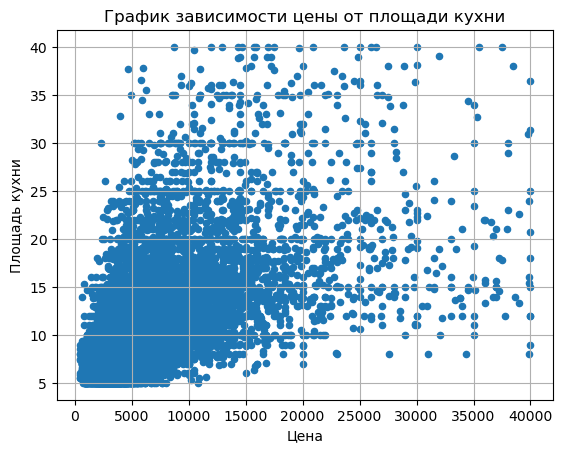

In [156]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', grid=True);
plt.title('График зависимости цены от площади кухни')
plt.xlabel('Цена')
plt.ylabel('Площадь кухни');

plt.show()

In [157]:
"{:.2f}".format(data['kitchen_area'].corr(data['last_price']))

'0.58'

Количество комнат. Цена растет увеличением числа комнат.

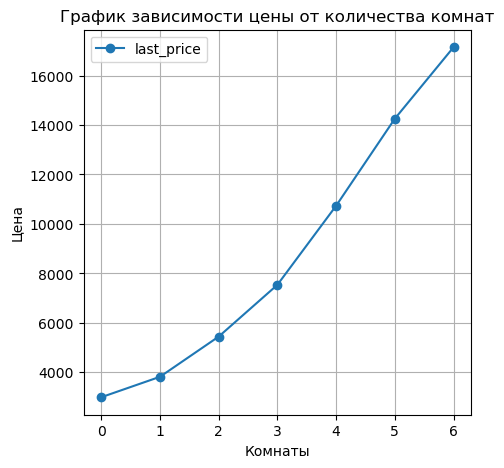

In [159]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5));
plt.title('График зависимости цены от количества комнат')
plt.xlabel('Комнаты')
plt.ylabel('Цена');

plt.show()

Тип этажа. Первый этаж традиционно самый дешевый. Последний - самый дорогой.

In [161]:
data['floors_type'] = data['last_price'].astype(int)

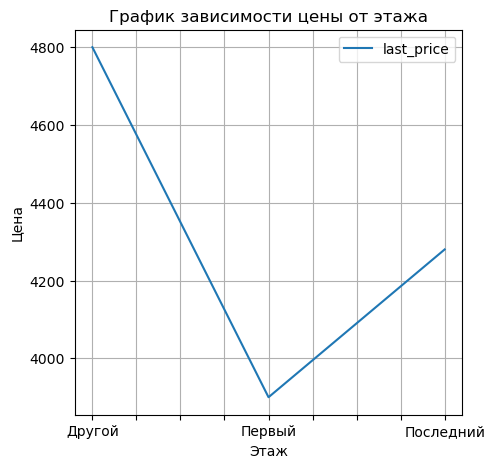

In [162]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, figsize=(5, 5));
plt.title('График зависимости цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена');

plt.show()

День публикации. Вторник-среда - самые дорогие публикации. Возможно это связано с тем что это самые активные дни. Здесь больше всего объявлений.

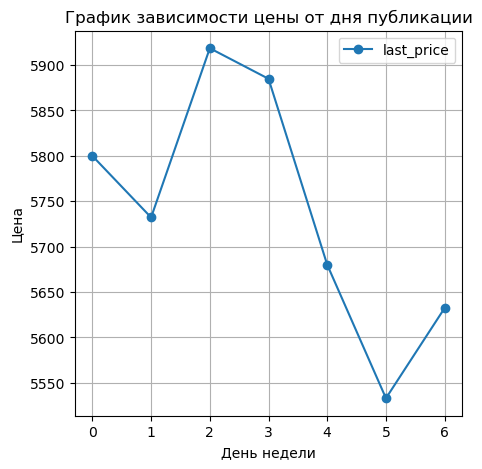

In [164]:
data.pivot_table(index='publication_day', values='last_price').plot(grid=True, style='o-', figsize=(5, 5));
plt.title('График зависимости цены от дня публикации')
plt.xlabel('День недели')
plt.ylabel('Цена');

plt.show()

Месяц публикации. Самые дорогие квартиры продаются в мае, сентябре и ноябре. В эти месяцы также публикуют наибольшее количество объявелений. 

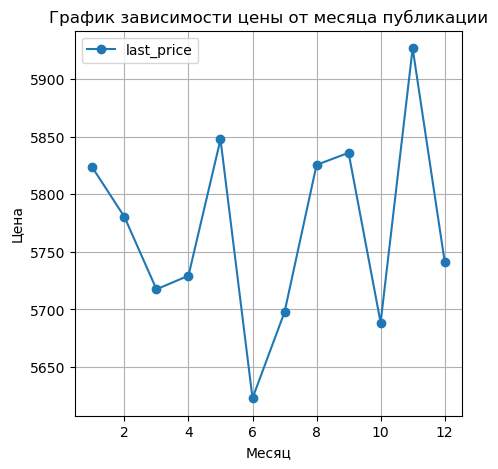

In [166]:
data.pivot_table(index='publication_month', values='last_price').plot(grid=True, style='o-', figsize=(5, 5));
plt.title('График зависимости цены от месяца публикации')
plt.xlabel('Месяц')
plt.ylabel('Цена');

plt.show()

In [167]:
"{:.3f}".format(data['publication_month'].corr(data['last_price']))

'0.004'

Средняя цена по годам. Цены падали с 2014 по 2017 год. В 2018 начался рост.

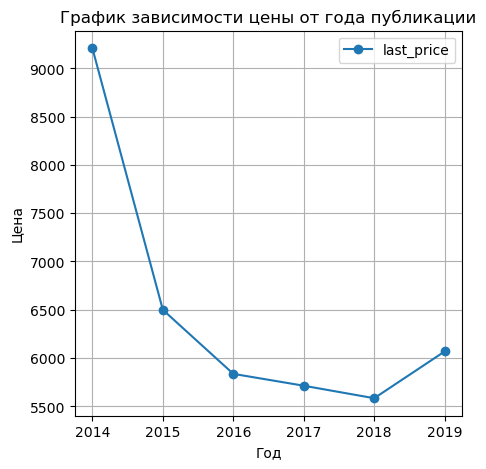

In [169]:
data.pivot_table(index='publication_year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5));
plt.title('График зависимости цены от года публикации')
plt.xlabel('Год')
plt.ylabel('Цена');

plt.show()

Средняя площадь квартир по годам. Средняя площадь квартир падала до 2017 года. С 2018 года немного подросла. 

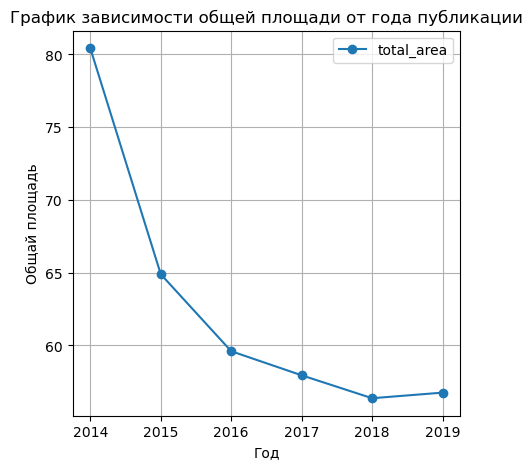

In [171]:
data.pivot_table(index='publication_year', values='total_area').plot(grid=True, style='o-', figsize=(5, 5));
plt.title('График зависимости общей площади от года публикации')
plt.xlabel('Год')
plt.ylabel('Общай площадь');

plt.show()

Количество объявлений по годам. Количество объявлений росло вплоть до 2017 года. С 2018 количество объявлений начало падать.

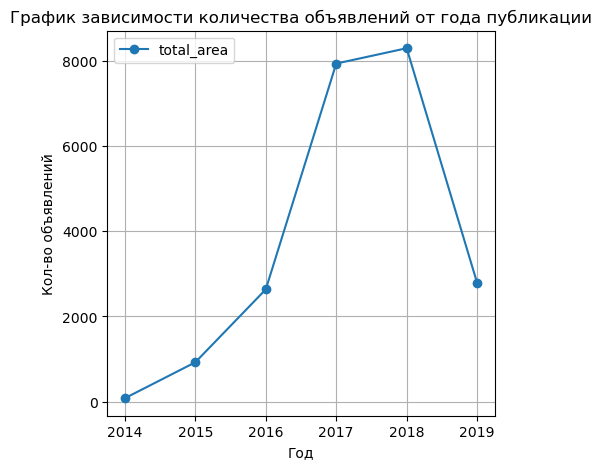

In [173]:
data.pivot_table(index='publication_year', values='total_area', aggfunc='count').plot(grid=True, style='o-', figsize=(5, 5));
plt.title('График зависимости количества объявлений от года публикации')
plt.xlabel('Год')
plt.ylabel('Кол-во объявлений');

plt.show()

Вывод: количество объявлений росло вплоть до 2017 года. При этом, уменьшалась средняя квадратура квартир(с 80 м2 в 2014 до 56 м2 в 2018). С 2018 года количество объявлений по продаже квартир снизилось. Это говорит о том, что рынок развивался очень активно в эти годы(в 2014 было всего 82 объявления, в 2018 - 8,292 объявления). 

### 10 населённых пунктах с наибольшим числом объявлений. Цена за квадратный метр по убыванию.


In [176]:
top_ten = data['locality_name'].value_counts().head(10)
price_meter_top_ten = data.query('locality_name in (@top_ten.index)').pivot_table(values='price_meter', index='locality_name')
price_meter_top_ten = price_meter_top_ten.astype(int)
price_meter_top_ten.sort_values('price_meter', ascending=False)

,price_meter
locality_name,
Санкт-Петербург,111356
Пушкин,103029
деревня Кудрово,92421
поселок Парголово,90240
поселок Мурино,85622
поселок Шушары,78475
Колпино,75298
Гатчина,68858
Всеволожск,68765


In [177]:
top_ten

locality_name
Санкт-Петербург      14939
поселок Мурино         535
поселок Шушары         433
Всеволожск             393
Пушкин                 349
Колпино                334
поселок Парголово      318
Гатчина                301
деревня Кудрово        294
Выборг                 233
Name: count, dtype: int64

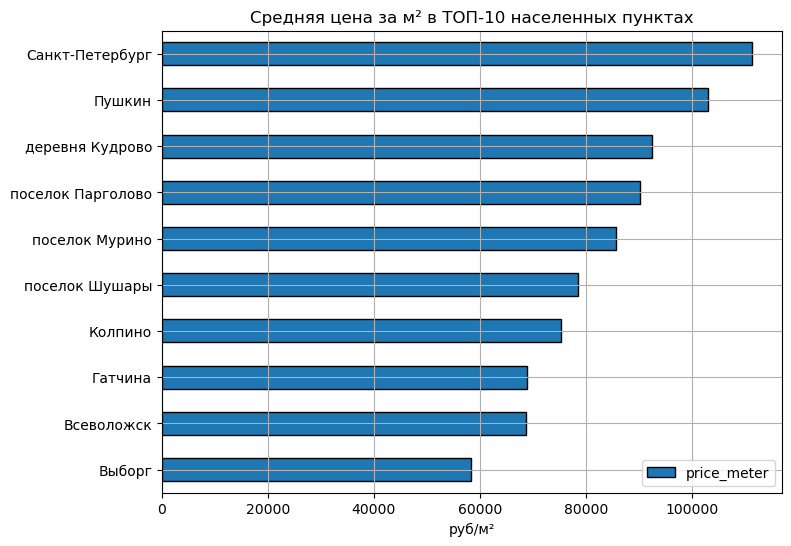

In [178]:
price_meter_top_ten.sort_values(by='price_meter').plot(kind='barh', legend=True, grid=True, ec='black', figsize=(8, 6))

plt.title('Средняя цена за м² в ТОП-10 населенных пунктах')
plt.xlabel('руб/м²')
plt.ylabel('')
plt.show()

###  Стоимость объектов в зависимости от расстояния до центра города

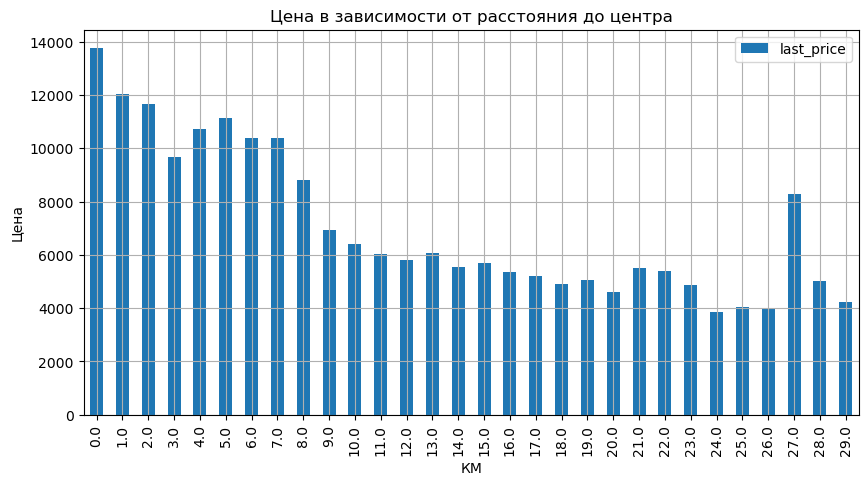

In [180]:
data.query('locality_name == "Санкт-Петербург"')\
    .pivot_table(index='distance_to_center', values='last_price')\
    .plot(grid=True, figsize=(10, 5), kind='bar');

plt.title('Цена в зависимости от расстояния до центра')
plt.xlabel('КМ')
plt.ylabel('Цена');

plt.show()

Судя по графику центр города находится в радиусе трех километров. В целом, логично, чем дальше от центра, тем цена ниже. При этом, тренд до 7-го километра не такой явный, много пиков. Думаю, это связано с наличием дорогих районов. Плюс есть всплеск на 27-м километре. Здесь находится город Пушкин.


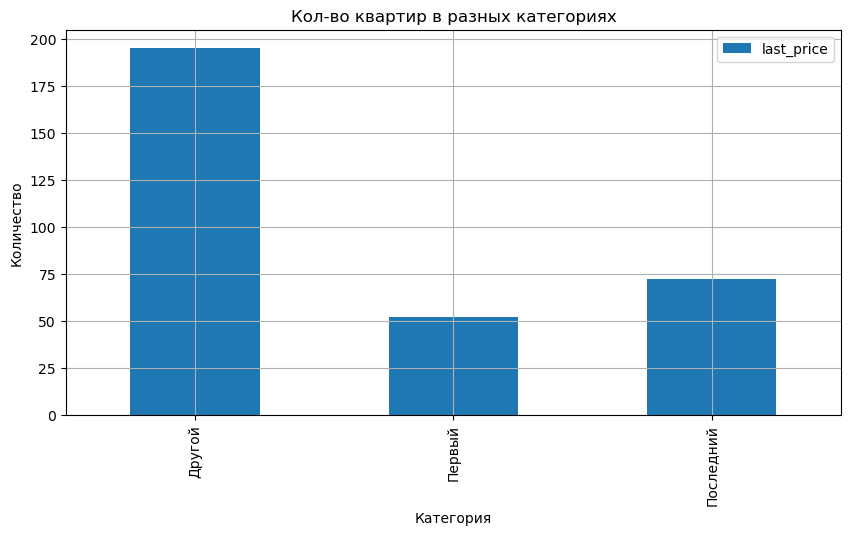

In [182]:
data.loc[(data['distance_to_center']==3) & (data['locality_name']=="Санкт-Петербург")]\
    .pivot_table(index='floor_type', values='last_price', aggfunc='count')\
    .plot(grid=True, figsize=(10, 5), kind='bar');

plt.title('Кол-во квартир в разных категориях')
plt.xlabel('Категория')
plt.ylabel('Количество');

plt.show()



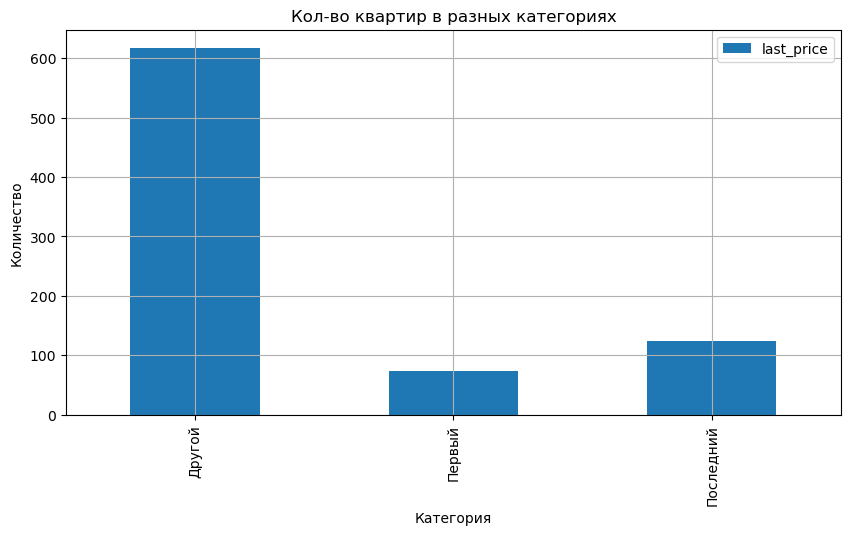

In [183]:
data.loc[(data['distance_to_center']==5) & (data['locality_name']=="Санкт-Петербург")]\
    .pivot_table(index='floor_type', values='last_price', aggfunc='count')\
    .plot(grid=True, figsize=(10, 5), kind='bar');

plt.title('Кол-во квартир в разных категориях')
plt.xlabel('Категория')
plt.ylabel('Количество');

plt.show()


## Шаг 5. Общий вывод

Исследование объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах с 2014 по 2019 год.
    
Прежде чем проводить исследование был проведен первичный анализ данных, во время которого было выявлено:
- Некорректное написание столбца cityCenters_nearest;
- Пропуски в следующих столбцах: ceiling_height; floors_total; living_area; is_apartment; kitchen_area; balcony; localitiy_name; airports_nearest; cityCenters_nearest; parks_around3000;  parks_nearest; ponds_nearest; ponds_around3000; days_exposition.
- Некорректные типы данных: first_day_exposition; last_price; floors_total; balcony
- Неявные дубликаты в столбце localicty_name
- Некорректные тип данных: first_day_exposition; last_price; floors_total; balcony
   Редкие и аномальные значения в следующих столбцах: last_price; total_area; rooms; ceiling_height; floors_total; kitchen_area
    
По результатам первичного анализа данных была проведена предобработка данных:
- Исправлено написание столбца cityCenters_nearest;
- Заменены пропуски в столбце balcony на нули (если продавец не указал число балконов, то, скорее всего, в его квартире их нет)
- Заменены пропуски в столбце ceiling_height. Пропуски заменены на медиану, так как стандрартые потолки 2.65 метра (медина). У тех у кого потолки высокие это обязательно указали бы.
- Отфильтрована высота потолков(столбец ceilling_height): 2.5 метра - минимум согласно СНиПу. Максимальную высоту установим на уровне шести метров.
- Удалены строки с пропусками в floor_total; locality_name. Ни медиана, ни среднее значение здесь не подходит. Таких строк мало. Их можно удалить. 
- Удалены строки с пропусками в floor_total; locality_name. Ни медиана, ни среднее значение здесь не подходит. Таких строк мало. Их можно удалить. 
- Заменены пропуски в столбце is_apartment.
- Заменен тип данных c float на integer в следующих столбцах: last price, floors_total, balcony.
- Заменены тип данных с object на date в столбце first_day_exposition.
- Обработаны неявные дупликаты в столбце localcity_name
- Удалены квартиры с жилой площадью больше 160 м2(89 штук)
- Удалены квартиры с жилой площадью меньше 10 м2(25 штук)
- Удалены квартиры с площадью кухни больше 40 м2(109 штук)
- Удалены квартиры с площадью кухни меньше 5 м2(104 штуки)
- Удалены объявления, которые продаются больше 1,000 дней(265 штук)
- Удалены объекты стоимостью ниже 100 тыс. руб.
- Удалены объекты стоимостью выше 40 млн. руб. (их меньше 1 процента)
- Удалены объекты с общей площадью меньше 14 кв. метров
- Удалены объекты с общей площадью больше 250 кв. метров
- Удалены объекты с количеством комнат больше 6
- Удалены объекты с аномальными значениями в столбце ceiling_height
- Удалены объекты, которые расположены выше 27 этажа
- Удалены объекты с кухней больше 45 кв. метров

Общие потери - 913 записей(3.8% от общего массива данных).

Добавлены новые столбцы:
- price_meter - цена за кв. метр
- publication_day - день публикации
- publication_month - месяц публикации
- publication_year - год публикации
- floor_type - тип этажа
- distance_to_center - расстояние до центра
    
Исследовательский анализ данных:
- Факторы, влияющие на стоимость: площадь, расстояние до центра. При этом есть районы, находящиеся дальше центра, но цена там выше. Самый дорогой район - Санкт-Петербург, самый дешевый - Выборг. Цена на первом этаже - самая низкая, на последнем выше, самая высокая цена на средних этажах.
- Срок продажи примерно 100 дней. Быстрая продажа - 45-60 дней. Похоже что это связано со скоростью оформления документов. 
- Средняя цена 5.8 миллиона. Количество объявлений росло вплоть до 2017 года. При этом, уменьшалась средняя квадратура квартир(с 80 м2 в 2014 до 56 м2 в 2018). С 2018 года количество объявлений по продаже квартир снизилось. Это говорит о том, что рынок развивался очень активно в эти годы(в 2014 было всего 82 объявления, в 2018 - 8,292 объявления). 
- Квартиры чаще всего продают весной и осенью. Цена за метр в это время также самая высокая. В будние дни публикуется основная масса объявлений. Также в будние (особенно вторник и среда) самая высокая цена за метр.
- Дома, в основном, 6 и 9 этажей. Основная масса людей живет в домах до 9 этажей. Квартиры, в основном, расположены в 13-14км от центра. Наблюдается общая доступность парков в регионе. Аэропорт Пулково находится в не города. Расстояние до него варьируется в диапазоне от 10 до 50км.  
    
    
    
    

    
    
    
    
    
    
 
</div>
